<h3>Importing Libaries</h3>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

<h3>Loading the Dataset</h3>

In [10]:
tmr_data_df = pd.read_csv('/home/hp/Desktop/TMR-EDA/Code/10_01_2023/data_for_10_01_2023/final_encoded_data_with_d1_d2_d3.csv')
tmr_data_df.head()

,RFP % Present,RFP Last Status,RFP Last Internal Rating,RFP Last TRACK Score,RFP Tech Ability,RFP Learnability,Last Graduation,RFP Communicability,RFP Avg TRACK Score,TechCategory,Year,Practice Head
0,76.0,2,3,3.34,1.68,1.72,4,0.86,4.26,2,2019.0,4
1,89.0,0,2,3.60,1.22,1.51,3,0.67,3.40,0,2020.0,1
2,79.0,0,3,4.40,1.74,1.75,3,0.93,4.42,2,2020.0,4
3,97.0,1,2,3.32,1.21,1.29,3,0.74,3.24,1,2020.0,1
4,76.0,0,3,4.28,1.59,1.66,3,0.88,4.13,0,2020.0,4


In [11]:
tmr_data_df.shape

(1247, 12)

<h3>Renaming the columns</h3>

In [12]:
# tmr_data_df = tmr_data_df.rename(columns={ 
#                                            'RFP Tech Ability \n(Out of 2)':'RFP Tech Ability',
#                                            'RFP- Learnability \n(Out of 2)':'RFP- Learnability',
#                                            'RFP-Communicability \n(Out of 1)':'RFP-Communicability',
#                                            'Trial Techability Score (Out of 2.0)':'Trial Techability Score',
#                                            'Trial Learnability Score (Out of 2.0)':'Trial Learnability Score',
#                                            'Trial Communicability Score (Out of 1.0)':'Trial Communicability Score'
#                                         })
# tmr_data_df.head(3)

<h2>Various Feature Selection Techniques</h2>

### Univariate Selection

In [13]:
y = tmr_data_df['TechCategory']
X = tmr_data_df.drop(columns='TechCategory', axis=1)

In [14]:
# Applying SelectKBest Algo
ordered_rank_features = SelectKBest(score_func=chi2,k=10)
ordered_features = ordered_rank_features.fit(X,y)

In [15]:
ordered_features

SelectKBest(score_func=<function chi2 at 0x7fb3141ae790>)

In [16]:
ordered_features.scores_

array([57.8830517 , 24.54565857,  2.36618486, 11.39524211,  7.26127854,
        4.79280613,  1.03482638,  2.36926147, 14.1664629 ,  5.15771953,
       14.40232869])

In [17]:
dfscores = pd.DataFrame(ordered_features.scores_,columns=['score'])
dfcolumns = pd.DataFrame(X.columns)

In [18]:
features_rank = pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['features','score']
features_rank

,features,score
0,RFP % Present,57.883052
1,RFP Last Status,24.545659
2,RFP Last Internal Rating,2.366185
3,RFP Last TRACK Score,11.395242
4,RFP Tech Ability,7.261279
5,RFP Learnability,4.792806
6,Last Graduation,1.034826
7,RFP Communicability,2.369261
8,RFP Avg TRACK Score,14.166463
9,Year,5.157720


In [19]:
# Top 10 features
features = features_rank.nlargest(16,'score')
feature = list(features['features'])
print(feature)

['RFP % Present', 'RFP Last Status', 'Practice Head', 'RFP Avg TRACK Score', 'RFP Last TRACK Score', 'RFP Tech Ability', 'Year', 'RFP Learnability', 'RFP Communicability', 'RFP Last Internal Rating', 'Last Graduation']


### Feature Importance

This technique is used to give you score for each feature the higher the score the more relevant the feature

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [21]:
model.feature_importances_

array([0.10049607, 0.0334047 , 0.03461109, 0.11054929, 0.12296756,
       0.11915914, 0.07539764, 0.11129057, 0.13376183, 0.08658738,
       0.07177473])

In [22]:
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10)

RFP Avg TRACK Score         0.133762
RFP Tech Ability            0.122968
RFP Learnability            0.119159
RFP Communicability         0.111291
RFP Last TRACK Score        0.110549
RFP % Present               0.100496
Year                        0.086587
Last Graduation             0.075398
Practice Head               0.071775
RFP Last Internal Rating    0.034611
dtype: float64

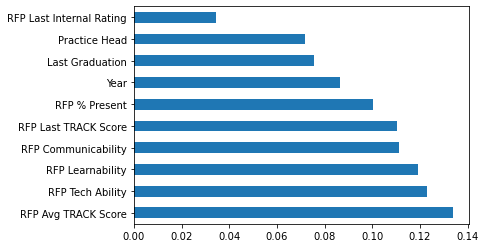

In [23]:
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

### Correlation

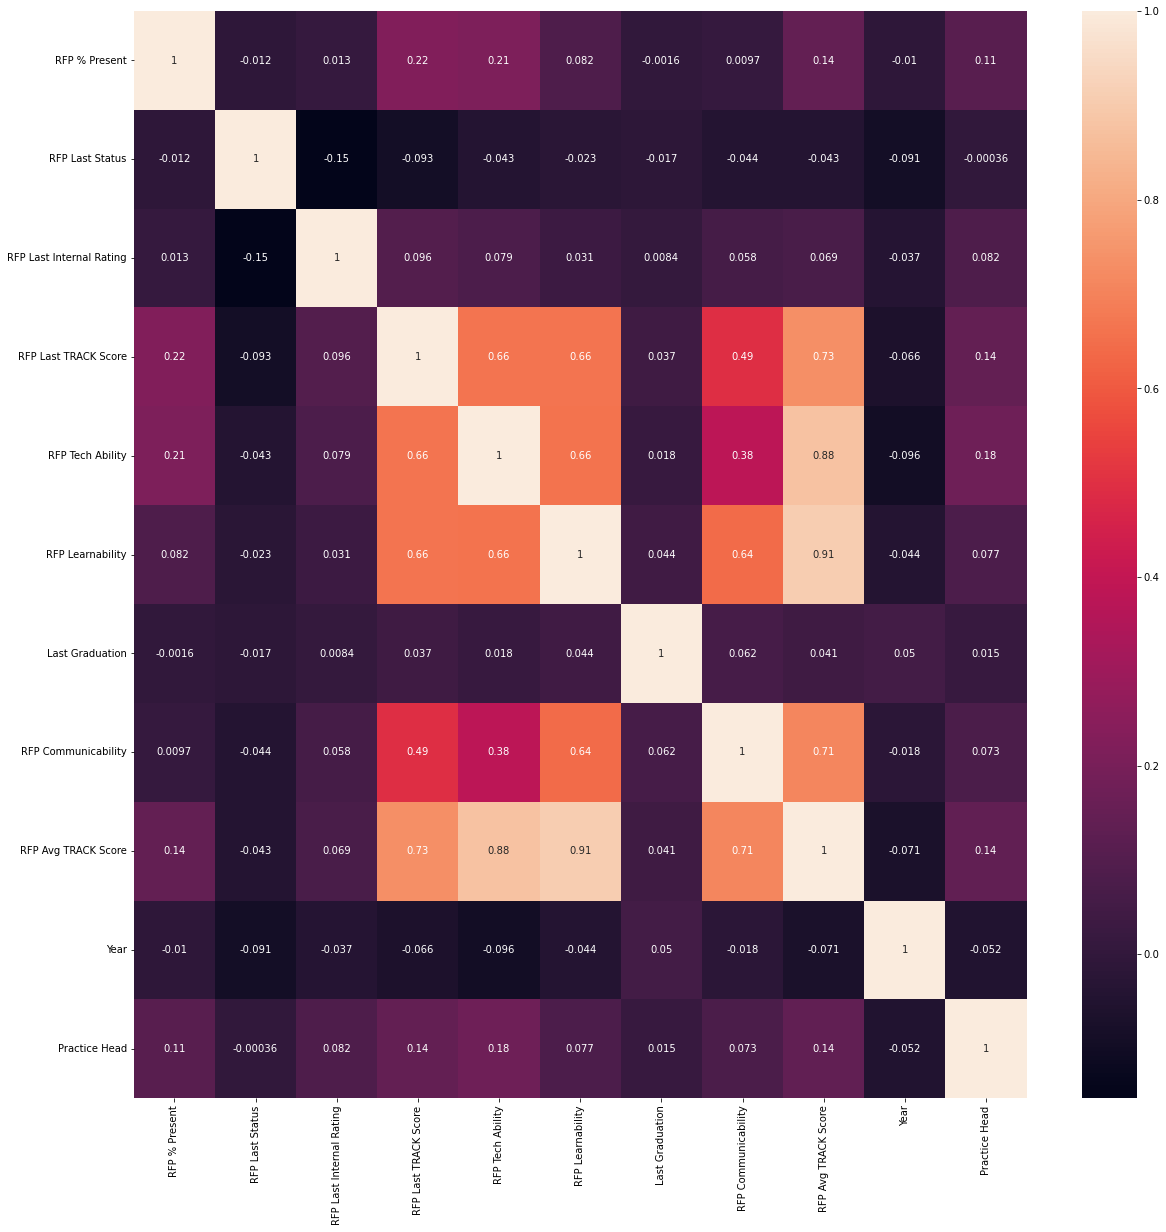

In [24]:
corr = X.corr()
top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(X[top_features].corr(),annot=True)
plt.show()

In [25]:
threshold=0.6

In [26]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set() #set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: #we are interested abs correlation value
                colname = corr_matrix.columns[i]  # getting the name of the column
                col_corr.add(colname)
    return col_corr

In [27]:
correlation(X,threshold)

{'RFP Avg TRACK Score',
 'RFP Communicability',
 'RFP Learnability',
 'RFP Tech Ability'}

### Information Gain

In [28]:
from sklearn.feature_selection import mutual_info_classif

In [29]:
mutual_info_values = mutual_info_classif(X,y)

In [30]:
mutual_data = pd.Series(mutual_info_values, index=X.columns)
mutual_data.sort_values(ascending=False)

RFP Avg TRACK Score         0.200345
RFP Learnability            0.141448
RFP Tech Ability            0.138685
RFP Communicability         0.120696
RFP Last TRACK Score        0.115276
RFP Last Status             0.083303
RFP Last Internal Rating    0.063602
Last Graduation             0.009802
RFP % Present               0.008329
Year                        0.003809
Practice Head               0.000000
dtype: float64